# linear_regression
Formula of linear regression


## formula

Linear relation between $y$ and $x$

$$\tag{1}
y = c_0 + c_1 x + \varepsilon = f(x).
$$

Intercept from Eqn (1) is

$$\tag{2}
c_0 = \frac{\displaystyle \sum_{i = 1}^N y_i \sum x_i^2 - \sum_{i = 1}^N x_i \sum x_i y_i}{\displaystyle N \sum_{i = 1}^N x_i^2 - \left( \sum_{i = 1}^N x_i \right)^2}
$$

and the slope from Eqn (1) is

$$\tag{3}
c_1 = \frac{\displaystyle N \sum_{i = 1}^N x_i y_i - \sum_{i = 1}^N x_i \sum y_i}{\displaystyle N \sum_{i = 1}^N x_i^2 - \left( \sum_{i = 1}^N x_i \right)^2}.
$$

Coefficient of determination is defined as

$$\tag{4}
R^2 = 1 - \frac{SS_{\rm res}}{SS_{\rm tot}},
$$

which requires residual sum of squares

$$\tag{5}
SS_{\rm res} = \sum_{i = 1}^N (y_i - f_i)^2 = \sum_{i = 1}^N \varepsilon_i^2
$$

total sum of squares

$$\tag{6}
SS_{\rm tot} = \sum_{i = 1}^N (y_i - \bar{y})^2,
$$

and mean of $y$

$$\tag{7}
\bar{y} = \frac{1}{N} \sum_{i = 1}^N y_i,
$$

where $R^2 \in [0, 1]$.

There are also other formulations

$$\tag{8a}
SS_{xy} = \sum_{i = 1}^N (x_i - \bar{x}) (y_i - \bar{y}),
$$

$$\tag{8b}
SS_{xx} = \sum_{i = 1}^N (x_i - \bar{x})^2,
$$

$$\tag{8c}
SS_{yy} = \sum_{i = 1}^N (y_i - \bar{y})^2,
$$

$$
r = \frac{SS_{xy}}{\sqrt{SS_{xx} SS_{yy}}},
$$

which is know as Pearson's correlation coefficient.

## derivation
How to derive Eqns (2) and (3) will be added later.

## functions

$$
\sum_{i = 1}^n a_i b_i
$$

In [1]:
def sum_product(a, b):
    N = min(len(a), len(b))
    s = 0
    for i in range(N):
        s += a[i]*b[i]
    return s

$$
y = f(x, c) = c_0 + c_1 x, \ \ \ \  c = \{c_0, c_1\}
$$

In [2]:
def f(x, c):
    y = []
    for i in x:
        y.append(c[0] + c[1] * i)
    return y

$$
\bar{a} = \frac{1}{N} \sum_{i = 1}^N a_i
$$

In [3]:
def avg(a):
    N = len(a)
    s = sum(a)
    abar = s / N
    return abar

$$
y = f(x, c) = c_0 + c_1 x, \ \ \ \  c = \{c_0, c_1\}
$$

$$
SS_{\rm res} = \sum_{i = 1}^N (y_i - f_i)^2 = \sum_{i = 1}^N \varepsilon_i^2
$$

In [4]:
def SSres(x, y, c):
    N = min(len(x), len(y))
    ymod = f(x, c)
    s = 0
    for i in range(N):
        s += (y[i] - ymod[i])**2
    return s

$$
\bar{a} = \frac{1}{N} \sum_{i = 1}^N a_i
$$

$$
SS_{ab} = \sum_{i = 1}^N (a_i - \bar{a}) (b_i - \bar{b})
$$

In [5]:
def SSab(x, y):
    N = min(len(x), len(y))
    ax = avg(x)
    ay = avg(y)
    s = 0
    for i in range(N):
        s += (x[i] - ax) * (y[i] - ay)
    return s

## test data 1

In [6]:
# define data
xobs = [1, 2, 3, 4, 5]
yobs = [3, 4, 5, 6, 7]

In [7]:
import math

N = len(xobs)

Sy = sum(yobs)
Sx = sum(xobs)
Sxx = sum_product(xobs, xobs)
Sxy = sum_product(xobs, yobs)

c0 = (Sy*Sxx - Sx*Sxy) / (N*Sxx - Sx*Sx)
c1 = (N*Sxy - Sx*Sy) / (N*Sxx - Sx*Sx)
c = [c0, c1]

r = SSab(xobs, yobs) / math.sqrt( SSab(xobs, xobs) * SSab(yobs, yobs) )
R2 = 1 - SSres(xobs, yobs, c) / SSab(yobs, yobs)

ymod = f(xobs, [c0, c1])

print("Data")
print("xobs =", xobs)
print("yobs =", yobs)
print()

print("Model")
print("c =", c)
print("ymod =", ymod)
print()

print("Pearson correlation coefficient")
print("r = ", r)
print("r2 = ", r*r)
print()

print("Coefficient of determination")
print("R2 = ", R2)

Data
xobs = [1, 2, 3, 4, 5]
yobs = [3, 4, 5, 6, 7]

Model
c = [2.0, 1.0]
ymod = [3.0, 4.0, 5.0, 6.0, 7.0]

Pearson correlation coefficient
r =  1.0
r2 =  1.0

Coefficient of determination
R2 =  1.0


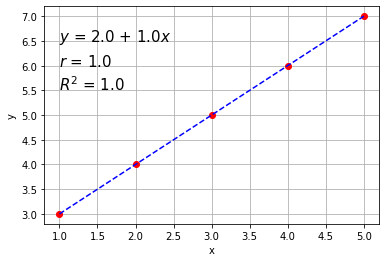

In [8]:
import matplotlib.pyplot as plt

plt.grid()
plt.xlabel("x")
plt.ylabel("y")

plt.text(1, 6.5, f"$y$ = {c[0]} + {c[1]}$x$", fontsize=15)
plt.text(1, 6.0, f"$r$ = {r}", fontsize=15)
plt.text(1, 5.5, f"$R^2$ = {R2}", fontsize=15)

plt.plot(xobs, yobs, 'ro', xobs, ymod, 'b--')
plt.show()

## test data 2

In [9]:
# define data
xobs = [1, 2, 3, 4, 5]
yobs = [3, 4.5, 5, 5.5, 7]

In [10]:
import math

N = len(xobs)

Sy = sum(yobs)
Sx = sum(xobs)
Sxx = sum_product(xobs, xobs)
Sxy = sum_product(xobs, yobs)

c0 = (Sy*Sxx - Sx*Sxy) / (N*Sxx - Sx*Sx)
c1 = (N*Sxy - Sx*Sy) / (N*Sxx - Sx*Sx)
c = [c0, c1]

r = SSab(xobs, yobs) / math.sqrt( SSab(xobs, xobs) * SSab(yobs, yobs) )
R2 = 1 - SSres(xobs, yobs, c) / SSab(yobs, yobs)

ymod = f(xobs, [c0, c1])

print("Data")
print("xobs =", xobs)
print("yobs =", yobs)
print()

print("Model")
print("c =", c)
print("ymod =", ymod)
print()

print("Pearson correlation coefficient")
print("r = ", r)
print("r2 = ", r*r)
print()

print("Coefficient of determination")
print("R2 = ", R2)

Data
xobs = [1, 2, 3, 4, 5]
yobs = [3, 4.5, 5, 5.5, 7]

Model
c = [2.3, 0.9]
ymod = [3.1999999999999997, 4.1, 5.0, 5.9, 6.8]

Pearson correlation coefficient
r =  0.9761870601839528
r2 =  0.9529411764705884

Coefficient of determination
R2 =  0.9529411764705882


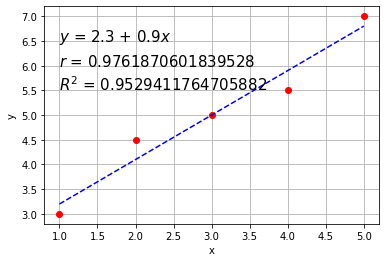

In [11]:
import matplotlib.pyplot as plt

plt.grid()
plt.xlabel("x")
plt.ylabel("y")

plt.text(1, 6.5, f"$y$ = {c[0]} + {c[1]}$x$", fontsize=15)
plt.text(1, 6.0, f"$r$ = {r}", fontsize=15)
plt.text(1, 5.5, f"$R^2$ = {R2}", fontsize=15)

plt.plot(xobs, yobs, 'ro', xobs, ymod, 'b--')
plt.show()

## test data 3

In [12]:
# define data
xobs = [1, 2, 3, 4, 5]
yobs = [3, 5, 5, 4, 7]

In [13]:
import math

N = len(xobs)

Sy = sum(yobs)
Sx = sum(xobs)
Sxx = sum_product(xobs, xobs)
Sxy = sum_product(xobs, yobs)

c0 = (Sy*Sxx - Sx*Sxy) / (N*Sxx - Sx*Sx)
c1 = (N*Sxy - Sx*Sy) / (N*Sxx - Sx*Sx)
c = [c0, c1]

r = SSab(xobs, yobs) / math.sqrt( SSab(xobs, xobs) * SSab(yobs, yobs) )
R2 = 1 - SSres(xobs, yobs, c) / SSab(yobs, yobs)

ymod = f(xobs, [c0, c1])

print("Data")
print("xobs =", xobs)
print("yobs =", yobs)
print()

print("Model")
print("c =", c)
print("ymod =", ymod)
print()

print("Pearson correlation coefficient")
print("r = ", r)
print("r2 = ", r*r)
print()

print("Coefficient of determination")
print("R2 = ", R2)

Data
xobs = [1, 2, 3, 4, 5]
yobs = [3, 5, 5, 4, 7]

Model
c = [2.7, 0.7]
ymod = [3.4000000000000004, 4.1, 4.8, 5.5, 6.2]

Pearson correlation coefficient
r =  0.7462025072446364
r2 =  0.5568181818181817

Coefficient of determination
R2 =  0.5568181818181819


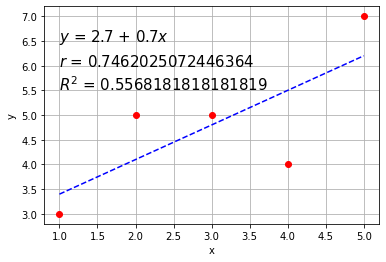

In [14]:
import matplotlib.pyplot as plt

plt.grid()
plt.xlabel("x")
plt.ylabel("y")

plt.text(1, 6.5, f"$y$ = {c[0]} + {c[1]}$x$", fontsize=15)
plt.text(1, 6.0, f"$r$ = {r}", fontsize=15)
plt.text(1, 5.5, f"$R^2$ = {R2}", fontsize=15)

plt.plot(xobs, yobs, 'ro', xobs, ymod, 'b--')
plt.show()

## test data 4

In [15]:
# define data
xobs = [1, 2, 3, 4, 5]
yobs = [3, 6, 5, 4, 7]

In [16]:
import math

N = len(xobs)

Sy = sum(yobs)
Sx = sum(xobs)
Sxx = sum_product(xobs, xobs)
Sxy = sum_product(xobs, yobs)

c0 = (Sy*Sxx - Sx*Sxy) / (N*Sxx - Sx*Sx)
c1 = (N*Sxy - Sx*Sy) / (N*Sxx - Sx*Sx)
c = [c0, c1]

r = SSab(xobs, yobs) / math.sqrt( SSab(xobs, xobs) * SSab(yobs, yobs) )
R2 = 1 - SSres(xobs, yobs, c) / SSab(yobs, yobs)

ymod = f(xobs, [c0, c1])

print("Data")
print("xobs =", xobs)
print("yobs =", yobs)
print()

print("Model")
print("c =", c)
print("ymod =", ymod)
print()

print("Pearson correlation coefficient")
print("r = ", r)
print("r2 = ", r*r)
print()

print("Coefficient of determination")
print("R2 = ", R2)

Data
xobs = [1, 2, 3, 4, 5]
yobs = [3, 6, 5, 4, 7]

Model
c = [3.2, 0.6]
ymod = [3.8000000000000003, 4.4, 5.0, 5.6, 6.2]

Pearson correlation coefficient
r =  0.6
r2 =  0.36

Coefficient of determination
R2 =  0.3600000000000002


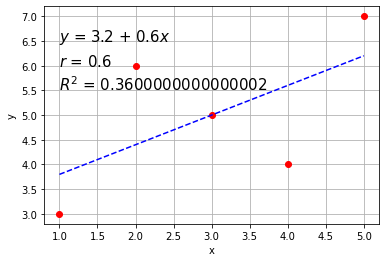

In [17]:
import matplotlib.pyplot as plt

plt.grid()
plt.xlabel("x")
plt.ylabel("y")

plt.text(1, 6.5, f"$y$ = {c[0]} + {c[1]}$x$", fontsize=15)
plt.text(1, 6.0, f"$r$ = {r}", fontsize=15)
plt.text(1, 5.5, f"$R^2$ = {R2}", fontsize=15)

plt.plot(xobs, yobs, 'ro', xobs, ymod, 'b--')
plt.show()

## test data 5

In [18]:
# define data
xobs = [1, 2, 3, 4, 5]
yobs = [3, 5, 7, 5, 3]

In [19]:
import math

N = len(xobs)

Sy = sum(yobs)
Sx = sum(xobs)
Sxx = sum_product(xobs, xobs)
Sxy = sum_product(xobs, yobs)

c0 = (Sy*Sxx - Sx*Sxy) / (N*Sxx - Sx*Sx)
c1 = (N*Sxy - Sx*Sy) / (N*Sxx - Sx*Sx)
c = [c0, c1]

r = SSab(xobs, yobs) / math.sqrt( SSab(xobs, xobs) * SSab(yobs, yobs) )
R2 = 1 - SSres(xobs, yobs, c) / SSab(yobs, yobs)

ymod = f(xobs, [c0, c1])

print("Data")
print("xobs =", xobs)
print("yobs =", yobs)
print()

print("Model")
print("c =", c)
print("ymod =", ymod)
print()

print("Pearson correlation coefficient")
print("r = ", r)
print("r2 = ", r*r)
print()

print("Coefficient of determination")
print("R2 = ", R2)

Data
xobs = [1, 2, 3, 4, 5]
yobs = [3, 5, 7, 5, 3]

Model
c = [4.6, 0.0]
ymod = [4.6, 4.6, 4.6, 4.6, 4.6]

Pearson correlation coefficient
r =  0.0
r2 =  0.0

Coefficient of determination
R2 =  0.0


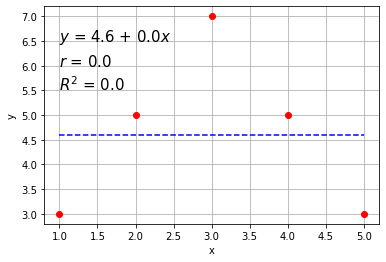

In [20]:
import matplotlib.pyplot as plt

plt.grid()
plt.xlabel("x")
plt.ylabel("y")

plt.text(1, 6.5, f"$y$ = {c[0]} + {c[1]}$x$", fontsize=15)
plt.text(1, 6.0, f"$r$ = {r}", fontsize=15)
plt.text(1, 5.5, f"$R^2$ = {R2}", fontsize=15)

plt.plot(xobs, yobs, 'ro', xobs, ymod, 'b--')
plt.show()

## test data 6

In [21]:
# define data
xobs = [1, 2, 3, 4, 5]
yobs = [3, 7, 5, 7, 3]

In [22]:
import math

N = len(xobs)

Sy = sum(yobs)
Sx = sum(xobs)
Sxx = sum_product(xobs, xobs)
Sxy = sum_product(xobs, yobs)

c0 = (Sy*Sxx - Sx*Sxy) / (N*Sxx - Sx*Sx)
c1 = (N*Sxy - Sx*Sy) / (N*Sxx - Sx*Sx)
c = [c0, c1]

r = SSab(xobs, yobs) / math.sqrt( SSab(xobs, xobs) * SSab(yobs, yobs) )
R2 = 1 - SSres(xobs, yobs, c) / SSab(yobs, yobs)

ymod = f(xobs, [c0, c1])

print("Data")
print("xobs =", xobs)
print("yobs =", yobs)
print()

print("Model")
print("c =", c)
print("ymod =", ymod)
print()

print("Pearson correlation coefficient")
print("r = ", r)
print("r2 = ", r*r)
print()

print("Coefficient of determination")
print("R2 = ", R2)

Data
xobs = [1, 2, 3, 4, 5]
yobs = [3, 7, 5, 7, 3]

Model
c = [5.0, 0.0]
ymod = [5.0, 5.0, 5.0, 5.0, 5.0]

Pearson correlation coefficient
r =  0.0
r2 =  0.0

Coefficient of determination
R2 =  0.0


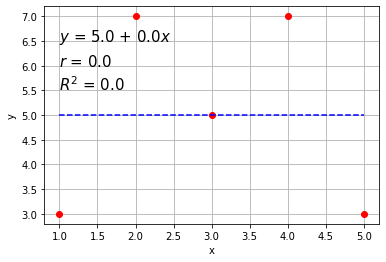

In [23]:
import matplotlib.pyplot as plt

plt.grid()
plt.xlabel("x")
plt.ylabel("y")

plt.text(1, 6.5, f"$y$ = {c[0]} + {c[1]}$x$", fontsize=15)
plt.text(1, 6.0, f"$r$ = {r}", fontsize=15)
plt.text(1, 5.5, f"$R^2$ = {R2}", fontsize=15)

plt.plot(xobs, yobs, 'ro', xobs, ymod, 'b--')
plt.show()

## comparison


![](image/lr_1.png) | ![](image/lr_2.png) | ![](image/lr_3.png)
:-: | :-: | :-:
![](image/lr_4.png) | ![](image/lr_5.png) | ![](image/lr_6.png)